In [ ]:
# 캐글 문서 비밀번호 - Bigdata!



In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
print("NumPy Version", np.__version__)
print("Pandas Version", pd.__version__)
print("Matplotlib Version", plt.__version__)
print("Seaborn Version", sns.__version__)
print("Scikit-Learn Version", sklearn.__version__)

NumPy Version 1.22.3
Pandas Version 1.4.2
Matplotlib Version 3.5.1
Seaborn Version 0.11.2
Scikit-Learn Version 1.1.1


In [ ]:
# scikit-learn 내장 데이터인 boston 불러오기 (보스턴 범죄발생률)
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [13]:
# CRIM: 지역별 범죄 발생률 
# ZN: 25,000 평방 피트를 초과하는 거주 지역의 비율
# INDUS: 비상업 지역 토지의 비율 
# CHAS: 찰스 강에 대한 더미 변수 - 강의 경계에 위치하면 1, 아니면 0
# NOX: 일산화질소 농도 
# RM: 주택 1가구당 평균 방 개수
# AGE: 1940년 이전에 건축된 소유 주택의 비율
# DIS: 5개 보스턴 고용 센터까지의 접근성 지수
# RAD: 고속도로까지의 접근성 지수
# TAX: 10,000달러당 재산세율
# PTRATIO: 지역별 교사 한 명당 학생 비율
# B: 지역의 흑인 거주 비율
# LSTAT: 하위 계층 비율(%)
# PRICE: 타깃(Target), 자신 소유의 주택 가격(중앙값)(단위: $1,000)
boston_df['PRICE'] = boston.target
boston_df.shape

(506, 14)

In [17]:
from sklearn.model_selection import train_test_split

y_target = boston_df['PRICE']
x_data = boston_df.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, random_state = 0)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 13) (152, 13) (354,) (152,)


In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()     # 선형모델(가장 기초)
lr.fit(x_train, y_train)

from sklearn import tree
clf = tree.DecisionTreeRegressor()  # 의사결정나무-회귀
clf.fit(x_train, y_train)

DecisionTreeRegressor()

In [57]:
from sklearn.metrics import mean_squared_error, r2_score #

y_pred_lr = lr.predict(x_test)                    # x_test의 예측치
mse_lr=mean_squared_error(y_test, y_pred_lr)    # 오차평균의 분산
rmse_lr=np.sqrt(mse_lr)                         # 분산 -> 표준편차
r2_lr=r2_score(y_test, y_pred_lr)

print("- linear regression -")
print("lr MSE:", round(mse_lr, 3))
print("lr RMSE:", round(rmse_lr, 3))

y_pred_clf = clf.predict(x_test)
mse_clf = mean_squared_error(y_test, y_pred_clf)
rmse_clf = np.sqrt(mse_clf)
r2_clf = r2_score(y_test, y_pred_clf)

print("- tree regression -")
print("lr MSE:", round(mse_clf, 3))
print("lr RMSE:", round(rmse_clf, 3))

- linear regression -
lr MSE: 27.196
lr RMSE: 5.215
- tree regression -
lr MSE: 23.764
lr RMSE: 4.875


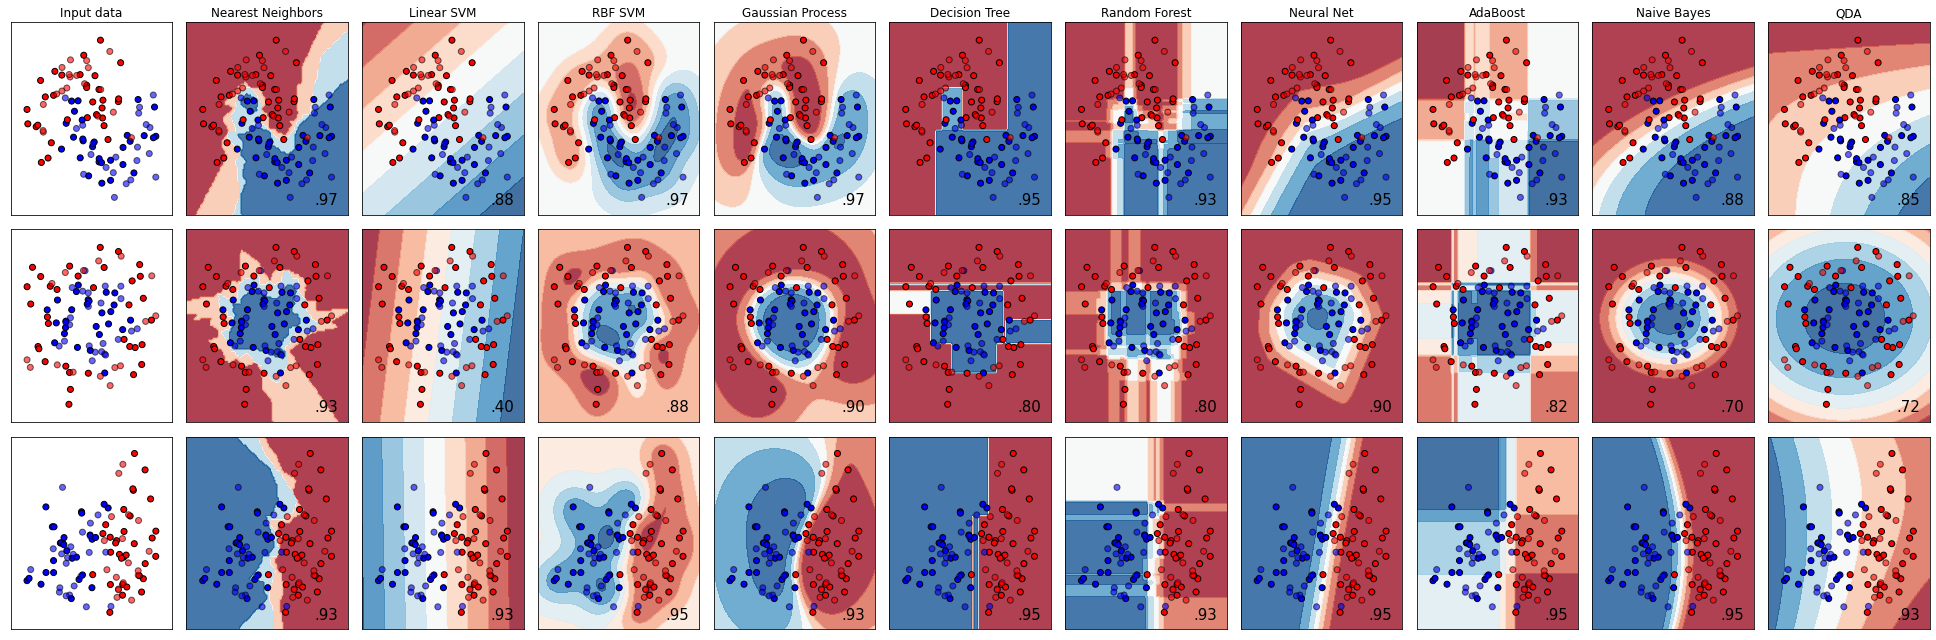

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()